# Neural Network - MLP - ScikitLearn

In [2]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Data Loading

In [3]:
data = pd.read_csv("academic success.csv", sep=";")

In [4]:
data.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [8]:
set(data['Target'].values)

{'Dropout', 'Enrolled', 'Graduate'}

In [9]:
data['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [10]:
import seaborn as sns

<Axes: xlabel='Target', ylabel='count'>

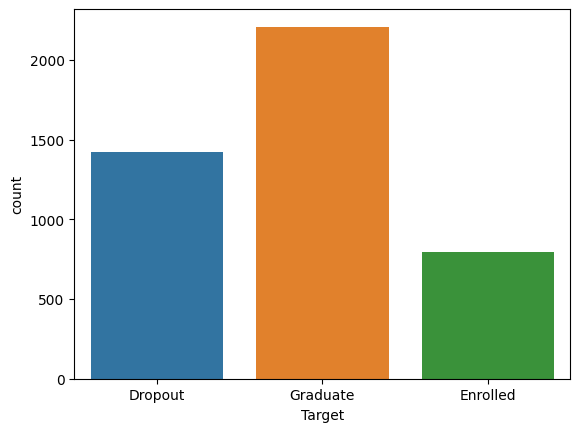

In [11]:
sns.countplot(data=data, x=data['Target'])

### Dimensionality Reduction

In [12]:
X = data.drop('Target', axis=1)
y = data['Target']

In [13]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

In [14]:
scaled_data

array([[-0.29482875, -0.09547022,  2.49089589, ..., -0.28763846,
         0.12438647,  0.76576084],
       [-0.29482875, -0.20986898, -0.55406775, ...,  0.87622207,
        -1.10522155,  0.34719942],
       [-0.29482875, -1.01066035,  2.49089589, ..., -0.28763846,
         0.12438647,  0.76576084],
       ...,
       [-0.29482875, -1.01066035, -0.55406775, ...,  0.87622207,
        -1.10522155,  0.34719942],
       [-0.29482875, -1.01066035, -0.55406775, ..., -0.81325289,
        -1.46687097, -1.37551124],
       [-0.29482875, -0.4958659 , -0.55406775, ...,  0.42569541,
         1.7879738 , -0.74987207]])

In [26]:
pca = PCA(n_components=25)

In [27]:
pca.fit(scaled_data)

PCA(n_components=25)

In [28]:
x_pca = pca.transform(scaled_data)

In [29]:
variance_values = pca.explained_variance_ratio_.tolist()

In [30]:
print(variance_values)

[0.1766639482370469, 0.09886989516715629, 0.058625585318584035, 0.05585338229824666, 0.05259359466100507, 0.04674366236631901, 0.04426996548937398, 0.04268044372561783, 0.0358818234670341, 0.034357782309443315, 0.03020782583851363, 0.028115384298441543, 0.027431248339792647, 0.025949506122819377, 0.024223877620302356, 0.022571083957376444, 0.021956203485722556, 0.020233799858920574, 0.01769753044550727, 0.016298881451814465, 0.01565796117688696, 0.014790858011020277, 0.012849995568449818, 0.012611763593062677, 0.011509604232465193]


In [31]:
# print(len(variance_values))
print(sum(variance_values[:25]))

0.9486456070409229


In [32]:
reduced_data = pd.DataFrame(x_pca)

In [33]:
reduced_data

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-6.101294,-0.296791,-1.428491,0.472800,0.801264,-2.060714,-2.721872,0.628532,0.250201,-1.355478,...,0.468315,2.309538,-0.343417,0.785448,1.431041,-0.460789,-0.427442,-0.388011,-0.732794,0.481512
1,-0.254507,-1.106861,-1.841772,0.603317,-1.205722,-0.779358,1.132180,-1.077095,0.807876,0.819564,...,0.306600,-0.193767,-0.117552,-0.237376,-2.169477,-0.232595,-1.532493,-0.648027,-0.479459,-0.641550
2,-3.954380,0.446635,0.007524,0.115662,2.210973,-0.530667,-2.253659,0.451021,0.717236,1.455800,...,1.983795,-1.131953,-0.550380,1.038827,-0.882714,-0.422281,-1.365841,0.623837,-0.184099,0.334814
3,0.421885,-0.958326,0.884233,-1.041023,0.816698,0.822866,-0.214387,0.478226,0.254595,0.238949,...,-1.411513,-0.267168,0.123997,-0.073968,-0.412655,-0.570284,0.814498,-0.116832,-0.162075,-0.305112
4,0.405696,2.791055,1.898494,-1.976661,-1.296870,1.376717,-0.428059,-0.231268,0.311194,-1.446288,...,-1.085220,0.787346,-1.109283,0.626915,-0.111079,0.696457,-0.652563,0.085399,-0.239961,2.046683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.114633,-1.760668,-1.026119,-0.464817,0.990092,0.416123,0.501767,-1.178168,-2.359125,-0.509126,...,1.573871,0.974121,-1.004767,1.077571,1.514734,-1.178188,-0.047661,0.436121,-0.027897,0.291994
4420,-1.114667,-0.920789,-2.645382,10.437429,-2.712947,10.282026,-3.475630,0.314809,0.277905,1.504875,...,0.005329,0.424145,-0.648663,0.568675,-1.109662,-0.049268,-0.202445,0.715242,0.880262,-0.284624
4421,0.698829,-1.140783,0.565486,-0.830040,-1.621958,-0.148058,0.719275,1.588642,0.521886,1.217846,...,0.353940,-0.741182,0.603015,-0.952657,-0.509503,1.362321,-0.571827,0.328118,-0.367989,0.444070
4422,-0.512864,-2.001537,0.020485,-0.952604,-2.561476,-0.777385,0.923425,2.989603,0.894326,1.301908,...,-0.061121,-0.932644,0.201471,-1.337997,-0.719354,-0.283910,0.877133,-0.176754,-0.119912,-1.049405


### One Hot Encoding

In [34]:
y

0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 4424, dtype: object

In [35]:
# Encoding Labels
from sklearn.preprocessing import OneHotEncoder

In [36]:
encoder = OneHotEncoder()

In [37]:
type(y)

pandas.core.series.Series

In [38]:
y = y.values
print(type(y))

<class 'numpy.ndarray'>


In [39]:
y.shape

(4424,)

In [40]:
y.ndim

1

In [42]:
y = y.reshape(-1, 1)
print(y.shape)

(4424, 1)


In [43]:
y.ndim

2

In [44]:
y

array([['Dropout'],
       ['Graduate'],
       ['Dropout'],
       ...,
       ['Dropout'],
       ['Graduate'],
       ['Graduate']], dtype=object)

In [45]:
encoded_y = encoder.fit_transform(y)

In [46]:
encoded_y

<4424x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4424 stored elements in Compressed Sparse Row format>

In [47]:
encoded_y = encoded_y.toarray()

In [48]:
encoded_y

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

### MLP

In [49]:
reduced_data.shape

(4424, 25)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(reduced_data, encoded_y, test_size=0.2, random_state=1)

In [52]:
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [53]:
X_train.shape

(3539, 25)

In [54]:
type(X_train)

pandas.core.frame.DataFrame

In [55]:
X_train.loc[0].values

array([-6.1012936 , -0.2967909 , -1.42849061,  0.47279978,  0.80126415,
       -2.06071405, -2.72187164,  0.62853171,  0.25020082, -1.3554775 ,
        0.70277963, -0.47130554, -0.19406536,  0.58735258, -0.6595889 ,
        0.46831529,  2.30953793, -0.34341672,  0.78544825,  1.43104149,
       -0.46078876, -0.42744158, -0.38801135, -0.7327941 ,  0.48151202])

In [56]:
clf = MLPClassifier(random_state=1, max_iter=500, solver='adam', activation='tanh', hidden_layer_sizes=200 )

In [57]:
clf.fit(X_train, y_train)

C:\Users\Tron\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=200, max_iter=500,
              random_state=1)

In [58]:
clf.score(X_test, y_test)

0.6474576271186441